<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/cam_xuc_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import numpy as argmax
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
%cd '/content/drive/MyDrive/cam_xuc_khuon_mat'

/content/drive/MyDrive/cam_xuc_khuon_mat


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cam_xuc_khuon_mat/training_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 616 images belonging to 7 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cam_xuc_khuon_mat/test_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 308 images belonging to 7 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,epochs = 70,validation_data=test_set,verbose = 1)

Epoch 1/70
20/20 [==============================] - 182s 9s/step - loss: 2.0959 - accuracy: 0.1380 - val_loss: 1.9448 - val_accuracy: 0.1688
Epoch 2/70
20/20 [==============================] - 42s 2s/step - loss: 1.9458 - accuracy: 0.1445 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/70
20/20 [==============================] - 42s 2s/step - loss: 1.9484 - accuracy: 0.1640 - val_loss: 1.9442 - val_accuracy: 0.1461
Epoch 4/70
20/20 [==============================] - 42s 2s/step - loss: 1.9461 - accuracy: 0.1282 - val_loss: 1.9459 - val_accuracy: 0.1364
Epoch 5/70
20/20 [==============================] - 44s 2s/step - loss: 1.9464 - accuracy: 0.1461 - val_loss: 1.9461 - val_accuracy: 0.1364
Epoch 6/70
20/20 [==============================] - 43s 2s/step - loss: 1.9436 - accuracy: 0.1299 - val_loss: 1.9429 - val_accuracy: 0.1623
Epoch 7/70
20/20 [==============================] - 43s 2s/step - loss: 1.9493 - accuracy: 0.1542 - val_loss: 1.9455 - val_accuracy: 0.1266
Epoch 8/70
20/20 [=

In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

1/1 [==============================] - 0s 43ms/step
cam_xuc : surprise


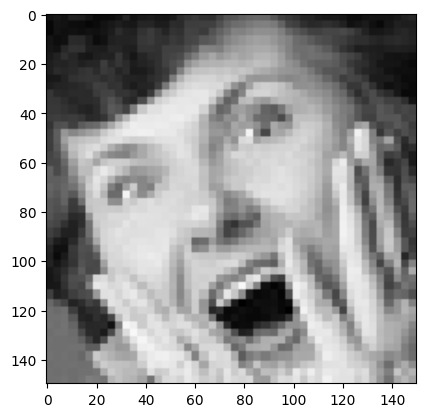

In [ ]:
img = load_img('/content/drive/MyDrive/cam_xuc_khuon_mat/val/2114.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
if (np.argmax(model_CNN.predict(img),axis=1) == 0): print('cam_xuc : angry')
if (np.argmax(model_CNN.predict(img),axis=1) == 1): print('cam_xuc : disgust')
if (np.argmax(model_CNN.predict(img),axis=1) == 2): print('cam_xuc : fear')
if (np.argmax(model_CNN.predict(img),axis=1) == 3): print('cam_xuc : happy')
if (np.argmax(model_CNN.predict(img),axis=1) == 4): print('cam_xuc : neutral')
if (np.argmax(model_CNN.predict(img),axis=1) == 5): print('cam_xuc : sad')
if (np.argmax(model_CNN.predict(img),axis=1) == 6): print('cam_xuc : surprise')

1/1 [==============================] - 0s 25ms/step
cam_xuc : happy
1/1 [==============================] - 0s 34ms/step


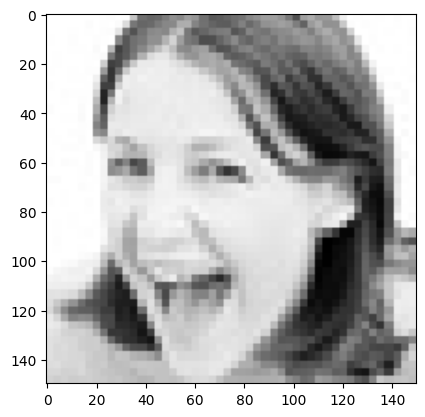

In [ ]:
img = load_img('/content/drive/MyDrive/cam_xuc_khuon_mat/val/1787.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
if (np.argmax(model_CNN.predict(img),axis=1) == 0): print('cam_xuc : angry')
if (np.argmax(model_CNN.predict(img),axis=1) == 1): print('cam_xuc : disgust')
if (np.argmax(model_CNN.predict(img),axis=1) == 2): print('cam_xuc : fear')
if (np.argmax(model_CNN.predict(img),axis=1) == 3): print('cam_xuc : happy')
if (np.argmax(model_CNN.predict(img),axis=1) == 4): print('cam_xuc : neutral')
if (np.argmax(model_CNN.predict(img),axis=1) == 5): print('cam_xuc : sad')
if (np.argmax(model_CNN.predict(img),axis=1) == 6): print('cam_xuc : surprise')

1/1 [==============================] - 0s 28ms/step
cam_xuc : fear
1/1 [==============================] - 0s 28ms/step


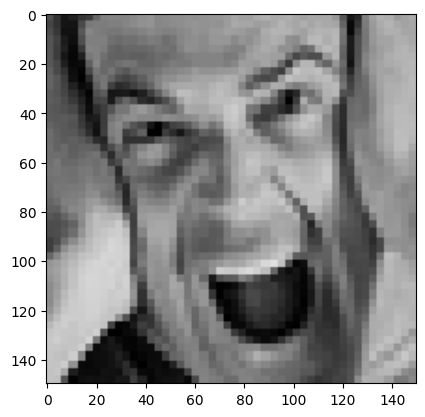

In [ ]:
img = load_img('/content/drive/MyDrive/cam_xuc_khuon_mat/val/365.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
if (np.argmax(model_CNN.predict(img),axis=1) == 0): print('cam_xuc : angry')
if (np.argmax(model_CNN.predict(img),axis=1) == 1): print('cam_xuc : disgust')
if (np.argmax(model_CNN.predict(img),axis=1) == 2): print('cam_xuc : fear')
if (np.argmax(model_CNN.predict(img),axis=1) == 3): print('cam_xuc : happy')
if (np.argmax(model_CNN.predict(img),axis=1) == 4): print('cam_xuc : neutral')
if (np.argmax(model_CNN.predict(img),axis=1) == 5): print('cam_xuc : sad')
if (np.argmax(model_CNN.predict(img),axis=1) == 6): print('cam_xuc : surprise')